<h2><div align="center"><font color= 'orange'><b> MonteCarlo Simulations </b></font></div></h2> 

[![Jupyter](https://img.shields.io/badge/Render-nbviewer-000000?style=square&logo=jupyter&logoColor=orange)](https://nbviewer.org/github/EstebanMqz/MonteCarlo-Simulation/blob/main/MC-Simulation.ipynb) [![MonteCarlo-Simulations](https://img.shields.io/badge/MonteCarlo_Simulation-README.md-black?style=square&logo=github&logoColor=black)](https://github.com/EstebanMqz/MonteCarlo-Simulation/tree/main) <br>
[![Creative Commons BY 3.0](https://img.shields.io/badge/License-CC%20BY%203.0-yellow.svg?style=square&logo=creative-commons&logoColor=white)](https://creativecommons.org/licenses/by/3.0/) 

<font color= 'gray'> Install venv *(if required)* : </font> 

In [8]:
%%capture
!pip install -r requirements.txt

In [1]:
#Dependencies
import glob

import functions as fn 
import visualizations as vs
import data as dt

#Libraries 
import numpy as np
import pandas as pd

import IPython.display as d
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

##### <font color= 'lightblue'> Declare Variables  [![Gists](https://img.shields.io/badge/Gists-Environment-010b38?style=square&logo=github&logoColor=black)](https://gist.github.com/EstebanMqz/f30253a8bf8cb50b4510aa8bda10bf7c) [![Gists](https://img.shields.io/badge/Gists-Docstrings-010b38?style=square&logo=github&logoColor=black)](https://gist.github.com/EstebanMqz/6dd3ae6038e5aeec223e80d9b5db3977) : </font> 



In [2]:
remote, author, env, ext = str('https://github.com/EstebanMqz/MonteCarlo-Simulations/blob/main/'), str('EstebanMqz'), str('requirements.txt'), str('*.py')
scripts = glob.glob(ext)

<font color= 'lightgreen'> Create/Update venv (add features) : </font> 

In [3]:
docstring_req = fn.docstring('MonteCarlo-Simulations', env, author, 'CC BY 3.0', remote + env)
dt.get_requirements(docstring_req, ext)

# -- --------------------------------------------------------------------------------------------------  -- #       
# -- Repository: MonteCarlo-Simulations
# -- Requirements: requirements.txt
# -- Author(s): EstebanMqz
# -- License: CC BY 3.0
# -- Environment: https://github.com/EstebanMqz/MonteCarlo-Simulations/blob/main/requirements.txt
# -- --------------------------------------------------------------------------------------------------  -- #

matplotlib >= 3.5.3
numpy >= 1.25.0
pandas >= 1.4.4
tabulate >= 0.8.9
jupyter >= 1.0.0 
ipython >= 8.10.0 

scripts: ['data.py', 'functions.py', 'visualizations.py']


<font color= 'lightblue'> Create & write docstrings in <i>ext. (*.py)</i> : </font> 

In [3]:
scripts = glob.glob('*.py')
docstrings = [fn.docstring('MonteCarlo-Simulations', scripts[i], author, 'CC BY 3.0', remote + str(scripts[i])) for i in range(len(scripts))]
[dt.write_docstring(docstrings[i], scripts[i]) for i in range(len(scripts))][0]

Succesfully created docstring for: data.py
Succesfully created docstring for: functions.py
Succesfully created docstring for: visualizations.py


#### **Tosing a Coin:** *Simulations of 10,000 Flips for 100 coin tosses games each with $50 Capital*

Simulations must be $n_{sim} \geq 10000$

#### 1. Tossing a Coin Game 

There's a game with the following rules in a Casino:<br>
1. Repeatedly toss a fair coin to win a prize until the difference between Heads and Tails is 3.
2. $\$1$ is the cost for each toss made, and the prize is $\$8$. 

Let's assume the plan is to toss a coin 100 times and we are not going to risk more than $\$50$.<br>
We want to know not only the most prob. outcome but also: <br><br>
*¿How much we are expected to have for every single toss?* 

#### <span style='color:lightblue'> MonteCarlo Simulations: </span><br>

If the Mean is:
$$\mu = \frac{1}{n} \sum_{i=1}^{n} x_i$$ 

The Expected Value $E(V)$ of MonteCarlo Simulations is simply the mean of simulated events $\mu_{M.C}$:
$$E(V) \approx \frac{1}{N_{sim}} \sum_{i=1}^{N_{sim}} V_i=\mu_{M.C}$$

In [4]:
initial_capital, bet, n_games, prize, sim  = 50, 1, 100, 8, 10000
df1 = dt.coin_game_sim(initial_capital, bet, n_games, prize, 0, sim).T
df1.head(8)

Sim,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
2,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,...,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0
3,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,...,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0
4,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,...,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0
5,46.0,46.0,46.0,46.0,46.0,55.0,46.0,55.0,55.0,46.0,...,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0
6,45.0,45.0,45.0,45.0,45.0,54.0,45.0,54.0,54.0,45.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
7,53.0,44.0,53.0,44.0,44.0,53.0,53.0,53.0,53.0,53.0,...,44.0,53.0,44.0,53.0,53.0,44.0,44.0,44.0,44.0,44.0
8,52.0,43.0,52.0,43.0,43.0,52.0,52.0,52.0,52.0,52.0,...,43.0,52.0,43.0,52.0,52.0,43.0,43.0,43.0,43.0,43.0


In [5]:
df1.tail(5)

Sim,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
96,27.0,0.0,45.0,45.0,36.0,36.0,-9.0,72.0,27.0,36.0,...,18.0,-9.0,54.0,18.0,27.0,63.0,54.0,18.0,27.0,45.0
97,26.0,-1.0,44.0,44.0,35.0,35.0,-10.0,80.0,26.0,35.0,...,17.0,-10.0,53.0,26.0,26.0,62.0,62.0,26.0,26.0,44.0
98,25.0,-2.0,43.0,43.0,34.0,34.0,-11.0,79.0,25.0,34.0,...,16.0,-11.0,52.0,25.0,25.0,61.0,61.0,25.0,25.0,43.0
99,24.0,-3.0,42.0,42.0,42.0,33.0,-12.0,78.0,24.0,33.0,...,24.0,-3.0,51.0,24.0,24.0,69.0,60.0,24.0,24.0,42.0
100,23.0,-4.0,41.0,41.0,41.0,32.0,-13.0,77.0,23.0,32.0,...,23.0,-4.0,50.0,23.0,23.0,68.0,59.0,23.0,23.0,41.0


Nevertheless each iteration has an $E(V)$, $E(RoI)$, <i>Prob. density function</i> $f(X)$ and $\&$ <i>Accum.</i> $F(X)$.<br>
Expected Values $E(V)$:

In [7]:
E_V1=pd.DataFrame(df1.T.mean(), columns=['E(V)'])
E_V1.index.name = 'Event'
E_V1['RoI'] = E_V1['E(V)'].pct_change().cumsum()
E_V1

,E(V),RoI
Event,,
1,50.0000,NaN
2,49.0000,-0.020000
3,48.0000,-0.040408
4,47.0000,-0.061241
5,48.2572,-0.034493
...,...,...
96,38.0817,-0.251008
97,38.9105,-0.229244
98,37.9105,-0.254944


Even though ${E(V)}\approx \mu_{M.C}$ in every simulation, there are other values that are possible as well $\forall N_{sim}$.

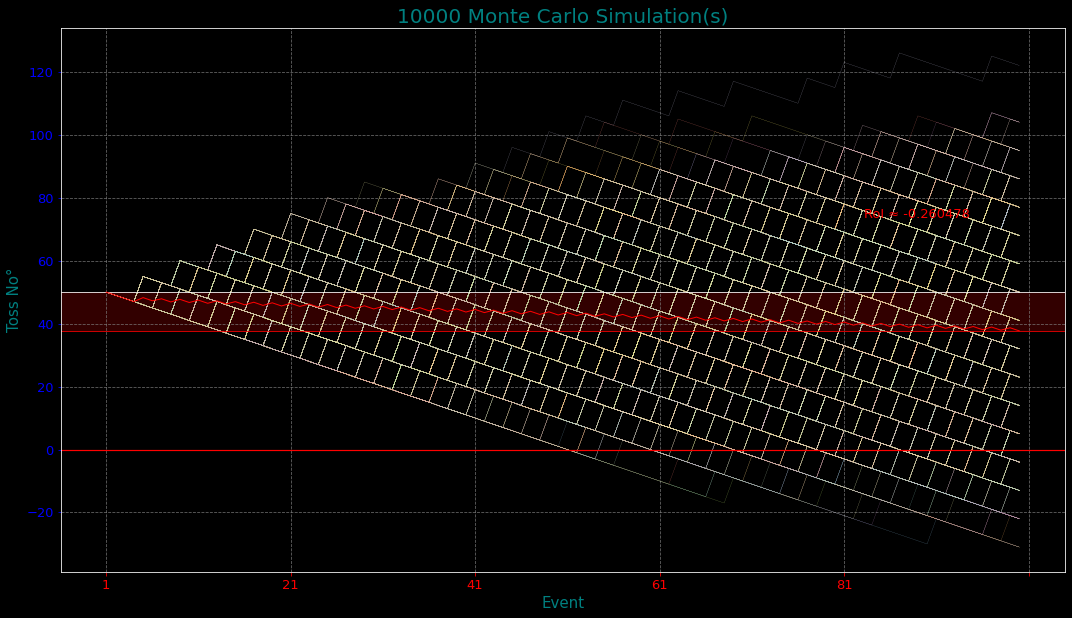

In [16]:
vs.MC_plot(df1, len(df1.columns),  E_V1, 'Capital', 'Toss No°')

If we were interested in probabilities we would need <i>the density function</i> $f(X)$ and the function $\&$ <i>Accum.</i> $F(X)$:

In [18]:
FV1 = df1.iloc[-1][df1.iloc[-1] > initial_capital]
FV1 = FV1.to_frame(name='FV: ' + str(n_games)).sort_values(by='FV: ' + str(n_games), ascending=False)
print(len(FV1), "ocurrences from", sim, "simulations: It lost money.")
FV1.head(5)

1951 ocurrences from 10000 simulations: It lost money.


,FV: 100
Sim,
1282,122.0
7952,104.0
6522,104.0
2133,104.0
7411,104.0


So the Prob. of Win/Lose $\forall n = 10000$ simulations are:

In [10]:
FV = df1.iloc[-1][df1.iloc[-1] > initial_capital]
WL1 = pd.DataFrame([FV.count()/sim, 1-(FV.count()/sim)], index=['True', 'False'], columns=['$Pr(FV_{Value} > i_{Value})$'])
d.Markdown(tabulate(WL1, headers='keys', tablefmt='pipe'))

|       |   $Pr(FV_{Value} > i_{Value})$ |
|:------|-------------------------------:|
| True  |                         0.1951 |
| False |                         0.8049 |

In this regard, the probability $f(X)$, its cumulative values $F(X)$ and its Expected values $E(V) = \mu_{M.C}$ are:

In [19]:
unique, counts = np.unique(df1.iloc[-1], return_counts=True)
df1_FV=pd.DataFrame({'$FV_{Value}$': unique, 'frequency': counts}).set_index('$FV_{Value}$').sort_values(by='$FV_{Value}$', ascending=True)
df1_FV['$f(X)$'] = df1_FV['frequency']/sim
df1_FV['$F(X)$'] = df1_FV['frequency'].cumsum()/sim

d.Markdown(tabulate(df1_FV, headers='keys', tablefmt='pipe'))

|   $FV_{Value}$ |   frequency |   $f(X)$ |   $F(X)$ |
|---------------:|------------:|---------:|---------:|
|            -31 |           5 |   0.0005 |   0.0005 |
|            -22 |          16 |   0.0016 |   0.0021 |
|            -13 |          60 |   0.006  |   0.0081 |
|             -4 |         194 |   0.0194 |   0.0275 |
|              5 |         462 |   0.0462 |   0.0737 |
|             14 |         850 |   0.085  |   0.1587 |
|             23 |        1380 |   0.138  |   0.2967 |
|             32 |        1767 |   0.1767 |   0.4734 |
|             41 |        1881 |   0.1881 |   0.6615 |
|             50 |        1434 |   0.1434 |   0.8049 |
|             59 |        1045 |   0.1045 |   0.9094 |
|             68 |         568 |   0.0568 |   0.9662 |
|             77 |         238 |   0.0238 |   0.99   |
|             86 |          70 |   0.007  |   0.997  |
|             95 |          23 |   0.0023 |   0.9993 |
|            104 |           6 |   0.0006 |   0.9999 |
|            122 |           1 |   0.0001 |   1      |

The $E(V) = \mu_{M.C}$ and the $Mo$ are:

In [20]:
FV_EV = pd.DataFrame([E_V1.iloc[-1][0], df1.iloc[-1].mode()[0]], index=['$\mu_{M.C}$', '$Mo$']).rename(columns={0: '$FV_{E(V)}$'}) #Mean and Mode values.
d.Markdown(tabulate(FV_EV, headers='keys', tablefmt='pipe'))

|             |   $FV_{E(V)}$ |
|:------------|--------------:|
| $\mu_{M.C}$ |       37.6808 |
| $Mo$        |       41      |

$\therefore$ The $Win_{Events}$ prob. in a $100$ games played are:

In [13]:
#Winning events
unique, counts = np.unique((df1.diff()==8).sum(), return_counts=True)
df1_ntosses=pd.DataFrame({'$Win_{events}$': unique, 'frequency': counts}).set_index('$Win_{events}$').sort_values(by='$Win_{events}$', ascending=True)
#Density functions
df1_ntosses['$f(X)$'] = df1_ntosses['frequency']/sim
df1_ntosses['$F(X)$'] = df1_ntosses['frequency'].cumsum()/sim
#Dataframe LateX
d.Markdown(tabulate(df1_ntosses, headers='keys', tablefmt='pipe'))

|   $Win_{events}$ |   frequency |   $f(X)$ |   $F(X)$ |
|-----------------:|------------:|---------:|---------:|
|                2 |           5 |   0.0005 |   0.0005 |
|                3 |          16 |   0.0016 |   0.0021 |
|                4 |          60 |   0.006  |   0.0081 |
|                5 |         194 |   0.0194 |   0.0275 |
|                6 |         462 |   0.0462 |   0.0737 |
|                7 |         850 |   0.085  |   0.1587 |
|                8 |        1380 |   0.138  |   0.2967 |
|                9 |        1767 |   0.1767 |   0.4734 |
|               10 |        1881 |   0.1881 |   0.6615 |
|               11 |        1434 |   0.1434 |   0.8049 |
|               12 |        1045 |   0.1045 |   0.9094 |
|               13 |         568 |   0.0568 |   0.9662 |
|               14 |         238 |   0.0238 |   0.99   |
|               15 |          70 |   0.007  |   0.997  |
|               16 |          23 |   0.0023 |   0.9993 |
|               17 |           6 |   0.0006 |   0.9999 |
|               19 |           1 |   0.0001 |   1      |

While the $E(V) = \mu_{M.C}$ and the $Mo$ for the $Win_{Events}$ are:

In [23]:
n_TossesEV = pd.DataFrame([(df1.diff()==8).sum().mean(),(df1.diff()==8).sum().mode()[0]], index=['$\mu_{M.C}$', '$Mo$']).rename(columns={0: '$Win_{Events_{E(V)}}$'}) #Mean and Mode values.
d.Markdown(tabulate(n_TossesEV, headers='keys', tablefmt='pipe'))

|             |   $Win_{Events_{E(V)}}$ |
|:------------|------------------------:|
| $\mu_{M.C}$ |                  9.6312 |
| $Mo$        |                 10      |

The histograms for the prob. density function $f(X)$ on the $Win_{Events}$ $\&$ $FV$ are illustrated:

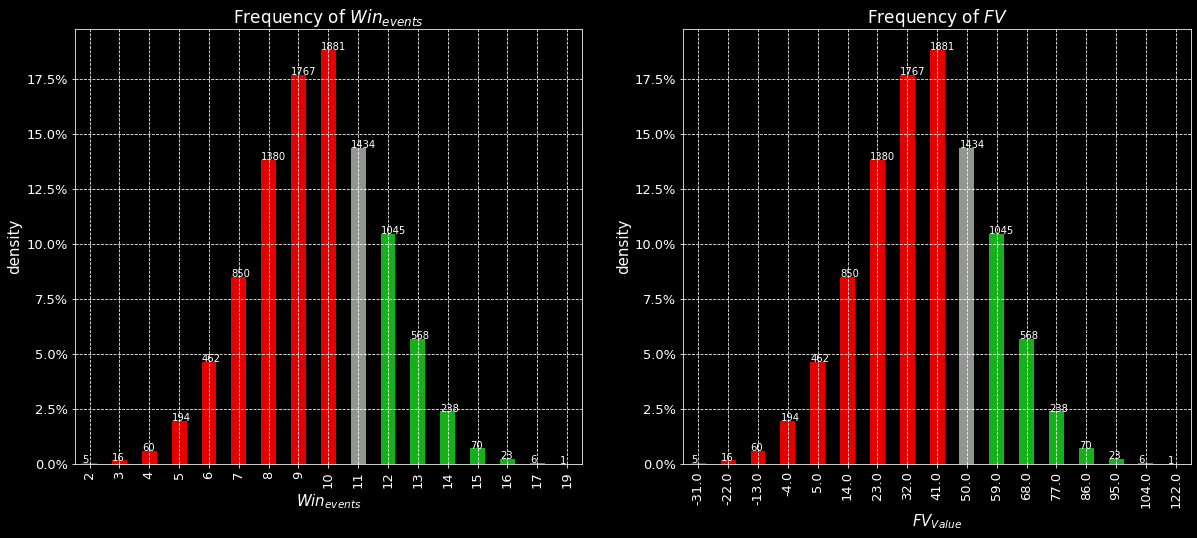

In [24]:
vs.bar_plots(df1_ntosses.iloc[:, :1], df1_FV.iloc[:, :1], '$Win_{events}$', '$FV_{Value}$', 'Frequency of $Win_{events}$', 'Frequency of $FV$')